In [52]:
#Import
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from torch import nn

In [53]:
#hyperparameters for dataset

NUM_CLASSES = 5
NUM_FEATURES = 2
RANDOM_SEED = 42

In [54]:
#Creating Multi-class data

X_blob, y_blob = make_blobs(n_samples=1000,
                             n_features=NUM_FEATURES,
                             centers=NUM_CLASSES,
                             cluster_std= 1.998,
                             random_state=RANDOM_SEED)

In [55]:
#data to tensors
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.float)

In [56]:
#train test split
X_train,X_test,y_train,y_test = train_test_split(X_blob,
                                                 y_blob,
                                                 test_size = 0.2,
                                                 random_state=RANDOM_SEED
                                                 )

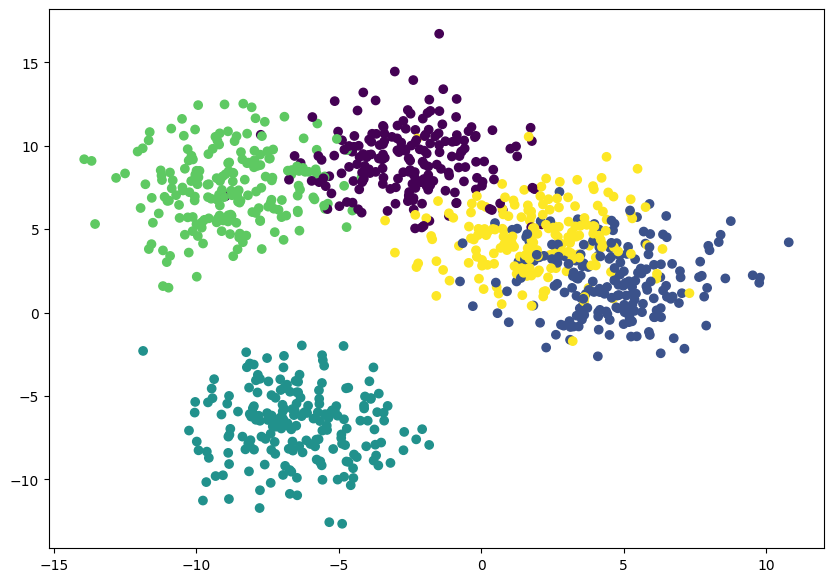

In [57]:
#plot data
plt.figure(figsize=(10,7))
plt.scatter(X_blob[:,0], X_blob[:,1], c=y_blob)

In [58]:
#device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [75]:
#model development
class multiclass_classification_ANN(nn.Module):
  def __init__(self, input_features, output_features, hidden_units=8):
    super().__init__()
    self.linear_layer_stack = nn.Sequential(
        nn.Linear(in_features=input_features,out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=output_features)
    )

    def forward(self, x):
      return self.linear_layer_stack(x)

In [77]:
#instance of the model class
model = multiclass_classification_ANN(input_features = NUM_FEATURES,
                                      output_features = NUM_CLASSES,
                                      hidden_units=16).to(device)

model

multiclass_classification_ANN(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=16, bias=True)
    (1): ReLU()
    (2): Linear(in_features=16, out_features=16, bias=True)
    (3): ReLU()
    (4): Linear(in_features=16, out_features=5, bias=True)
  )
)